## Problem: A non linear Function

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [28]:
x.shape,y.shape

((200,), (200,))

In [11]:
#np.meshgrid Make N-D coordinate arrays for vectorized evaluations

X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

Let us take a non-linear function - Hyperbolic Paraboloid

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

In [12]:
Z = 2*X**2 - 3*Y**2 + 1*c + e

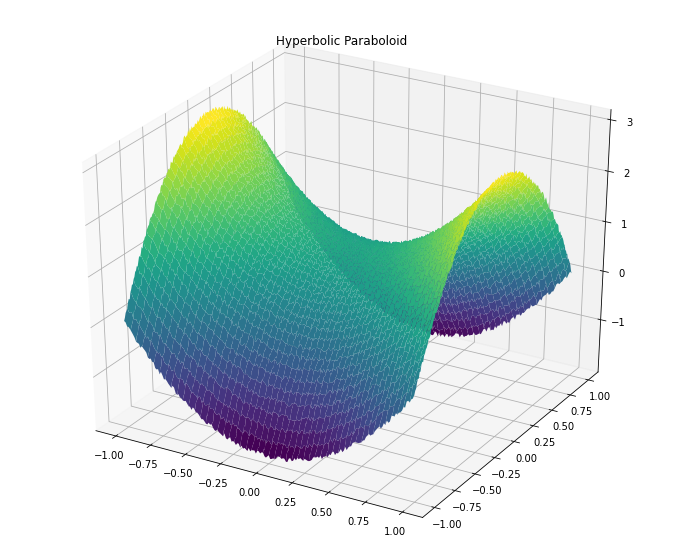

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.set_title('Hyperbolic Paraboloid');

## Using Neural Network

### Step 0: Load the Keras Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 1: Create the input and output

In [20]:
#Translates slice objects to concatenation along the second axis.
input_xy = np.c_[X.reshape(-1,1),Y.reshape(-1,1)]
output_z = Z.reshape(-1,1)

In [21]:
# Features + Target = same n rows
input_xy.shape,output_z.shape

((40000, 2), (40000, 1))

### Step 2: Create the Transformation & Prediction Model

In [22]:
model = Sequential()
model.add(Dense(64, input_dim=2,  activation="relu"))
model.add(Dense(32,  activation="relu"))
model.add(Dense(1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [31]:
from tensorflow.keras.optimizers import RMSprop
#model.compile(loss='mse', optimizer=RMSprop(lr=0.00001), metrics=["mse"])
model.compile(loss='mse', optimizer=RMSprop(lr=0.1), metrics=["mse"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


https://keras.rstudio.com/reference/fit.html

In [29]:
%%time
epochs =12
output = model.fit(input_xy, 
                   output_z, 
                   epochs=epochs, 
                   shuffle=True, 
                   verbose=1
                   )

Epoch 1/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1047 - mse: 0.1047
Epoch 2/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 3/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1041 - mse: 0.1041
Epoch 4/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1040 - mse: 0.1040
Epoch 5/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1033 - mse: 0.1033
Epoch 6/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1037 - mse: 0.1037
Epoch 7/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1036 - mse: 0.1036
Epoch 8/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1033 - mse: 0.1033
Epoch 9/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1045 - mse: 0.1045
Epoch 10/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1048 - mse: 0.1048
Epoch 11/12
1250/1250 [======

### Step 4: Evaluate Model Performance

In [26]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-py3-none-any.whl size=8613 sha256=8222972f5365340c5e8cced915f733418ac3130952f4c0a08e5e3af3be679444
  Stored in directory: /root/.cache/pip/wheels/9e/2e/42/17cb826d143226e4d081aa33d3a9b9a90f234dfcf409824b87
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-py3-none-any.whl size=7612 sha256=d438e406b45cd1d3b8f2ac3936b4bb36e7d9b6beff294c6683e455a5ec4fc4e5
  Stored in directory: /root/.cache/pip/wheels/15/65/34/2e11a0da3cf6f112da5c402e01c454be619ff85a0fb38b3018
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=c964479469c594a1d7f5ed96a759d2d64a13205e9424462e4a01522a4f199532
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


Epoch 1/12
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1037 - mse: 0.1037
Epoch 2/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0676 - mse: 0.0676
Epoch 3/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0419 - mse: 0.0419
Epoch 4/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0258 - mse: 0.0258
Epoch 5/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0179 - mse: 0.0179
Epoch 6/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0153 - mse: 0.0153
Epoch 7/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 8/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0135 - mse: 0.0135
Epoch 9/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 10/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0125 - mse: 0.0125
Epoch 11/12
1250/1250 [======

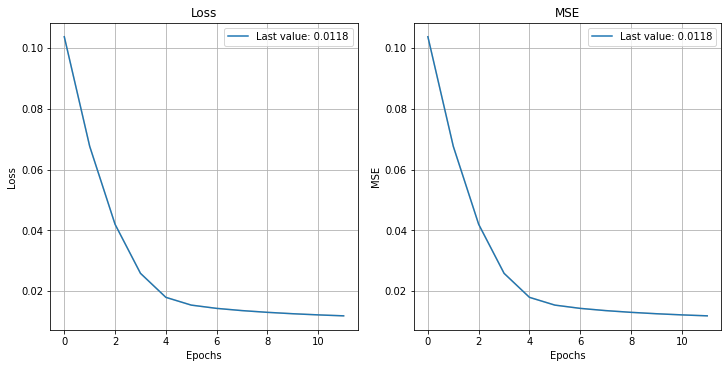

In [32]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

history = model.fit(input_xy, 
                    output_z, 
                    epochs=epochs,
                    shuffle=True, 
                    verbose=1).history

plot_history(history);

### Step 5: Make Prediction from the model

In [34]:
Z_pred = model.predict(input_xy).reshape(200,200)
Z_pred.shape

(200, 200)

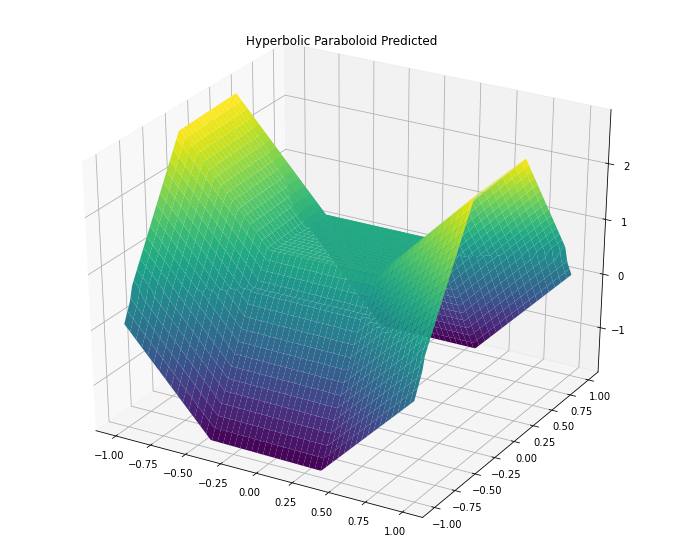

In [35]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z_pred,cmap='viridis')
ax.set_title('Hyperbolic Paraboloid Predicted');